### Importing necessary libraries

In [19]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import glob

In [20]:
# use a personal style sheet
plt.style.use("./styles/mystyle.mplstyle")

# listing all the current data
data_files = glob.glob(r'../Experiment/data/*.csv') # taking only the two complete files

In [21]:
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_csv(data_files[i])
    df = pd.concat([df, temp_df])

# select only the main task
df = df.loc[df['task']=='experiment']

# extracting sample size
n = len(set(df.pt_num))

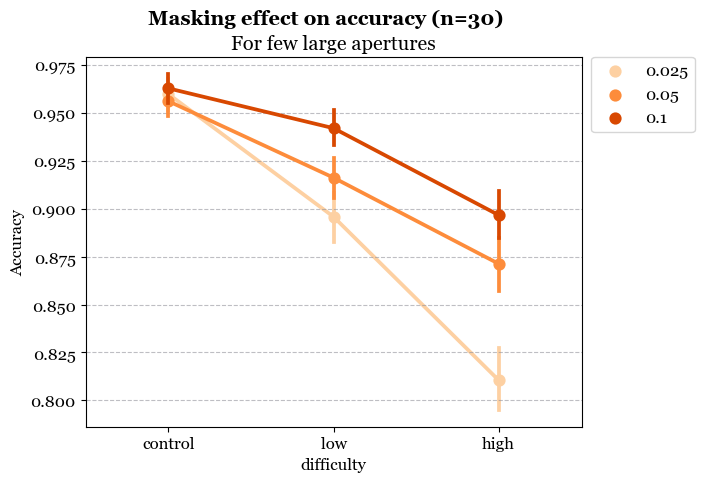

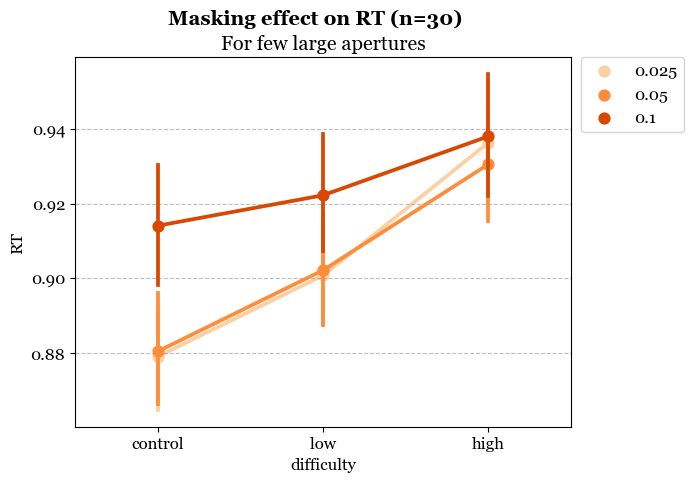

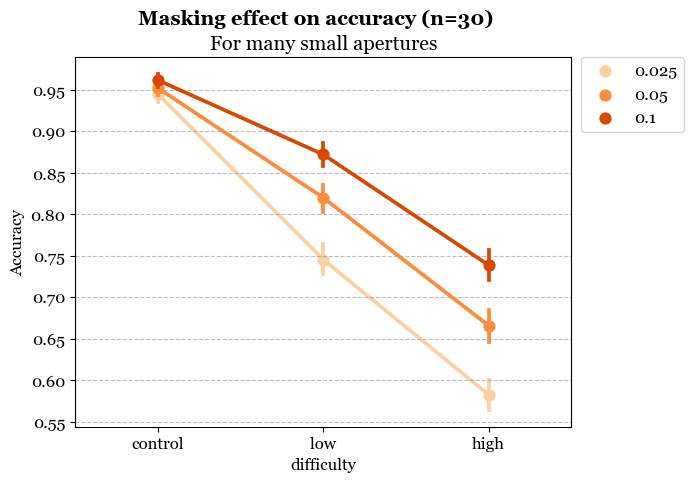

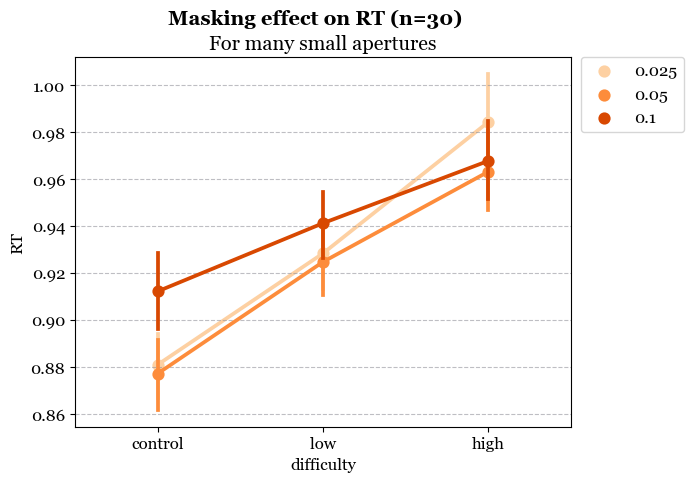

In [22]:
# checking the effect of masking
# for each occluder size separately
for so in set(df['size_occl']):
    # for each measure of performance separately
    for dv in ['acc', 'rt']:
        if dv == 'rt':
            data = df.loc[df['acc']] # only take correct trials for RT
        elif dv == 'acc':
            data = df
        plt.figure()
        plot = sns.pointplot(
            data = data.loc[data['size_occl']==so],
            y = dv,
            x = 'difficulty',
            order = ['control', 'low', 'high'],
            hue = 'soa',
            palette = 'Oranges',
            join = True
        )
        if dv == 'acc':
            # plt.ylim(0.6, 1)
            plt.ylabel("Accuracy")
            plt.suptitle("Masking effect on accuracy (n={})".format(n))
        elif dv == 'rt':
            # plt.ylim(900, 1200)
            plt.ylabel("RT")
            plt.suptitle("Masking effect on RT (n={})".format(n))
        plt.title('For {} apertures'.format(so))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.show()

In [23]:
data_files

['../Experiment/data\\results_1.csv',
 '../Experiment/data\\results_10.csv',
 '../Experiment/data\\results_11.csv',
 '../Experiment/data\\results_12.csv',
 '../Experiment/data\\results_13.csv',
 '../Experiment/data\\results_14.csv',
 '../Experiment/data\\results_15.csv',
 '../Experiment/data\\results_16.csv',
 '../Experiment/data\\results_17.csv',
 '../Experiment/data\\results_18.csv',
 '../Experiment/data\\results_19.csv',
 '../Experiment/data\\results_2.csv',
 '../Experiment/data\\results_20.csv',
 '../Experiment/data\\results_21.csv',
 '../Experiment/data\\results_22.csv',
 '../Experiment/data\\results_23.csv',
 '../Experiment/data\\results_24.csv',
 '../Experiment/data\\results_25.csv',
 '../Experiment/data\\results_26.csv',
 '../Experiment/data\\results_27.csv',
 '../Experiment/data\\results_28.csv',
 '../Experiment/data\\results_29.csv',
 '../Experiment/data\\results_3.csv',
 '../Experiment/data\\results_30.csv',
 '../Experiment/data\\results_4.csv',
 '../Experiment/data\\results